In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\msyeu\Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_ords_prods_merge_customers.pkl'))

In [5]:
#Checking dataframe
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependents,Marital_Status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.shape

(23918195, 34)

# 2. Consider any security implications that might exist for this new data. You'll need to address PII data in the data before continuing your analysis. 

First name and last name should be dropped due to PII

In [7]:
#dropping first and last name
df.drop(['First_name', 'Last_name'], axis=1, inplace = True)

In [8]:
#checking column names
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_dependents', 'Marital_Status', 'income'],
      dtype='object')

# Step 3a. Create a "Region" column based on the State column from your customers data set. 

In [9]:
#Creating region lists

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
#Creating regional flag column

df.loc[df['State'].isin(Northeast),'region']='Northeast'
df.loc[df['State'].isin(Midwest),'region']='Midwest'
df.loc[df['State'].isin(South),'region']='South'
df.loc[df['State'].isin(West),'region']='West'

In [11]:
#Checking length of new column
len(df['region'])

23918195

In [12]:
#checking frequency
df['region'].value_counts(dropna = False)

region
South        7970849
West         6110253
Midwest      5621692
Northeast    4215401
Name: count, dtype: int64

# Step 3b. Determine whether there's a difference in spending habits between the different U.S. regions. 

In [13]:
#Creating a crosstab

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,118446,5503246
Northeast,74316,4141085
South,154701,7816148
West,116151,5994102


# Step 4.  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
#Creating exclusion flag column

df.loc[df['max_order']<5, 'activity']='low'
df.loc[df['max_order']>=5, 'activity']='high'

In [16]:
#Create a dataframe of customers with orders less than 5

df_low = df[df['activity'] =='low']

In [17]:
#Checking dataframe

df_low.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,Gender,State,Age,date_joined,Number_of_dependents,Marital_Status,income,region,activity
360,2717275,5,1,3,12,NaN,True,15349,1,0,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
361,2717275,5,1,3,12,NaN,True,21413,2,0,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
362,2717275,5,1,3,12,NaN,True,48775,3,0,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
363,2717275,5,1,3,12,NaN,True,28289,4,0,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low
364,2717275,5,1,3,12,NaN,True,8518,5,0,...,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low


In [18]:
df_low['activity'].value_counts(dropna = False)

activity
low    1063248
Name: count, dtype: int64

In [19]:
#Exporting df_low

df_low.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'low_activity_customers.pkl'))

# Step 5-7. Create a profiling variable based on age, income, certain goods in the "department_id" column and number of dependents. Create an appropriate visualization to show the distribution of profiles. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Age Profile

In [20]:
#Creating age profiling variable

df.loc[df['Age']<=25, 'age_group']='Young Adult'
df.loc[(df['Age']<65)&(df['Age']>25), 'age_group']='Adult'
df.loc[df['Age']>=65, 'age_group']='Senior'

In [21]:
# Checking new variable

df['age_group'].value_counts()

age_group
Adult          14626665
Senior          6323591
Young Adult     2967939
Name: count, dtype: int64

In [23]:
# Aggregate for age group usage frequency

df.groupby('age_group').agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
age_group                                           
Adult                           10.408892  0.0  30.0
Senior                          10.342404  0.0  30.0
Young Adult                     10.366206  0.0  30.0

In [24]:
# Aggregate for age group expenditure

df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.563622  1.0  99999.0
Senior       11.883334  1.0  99999.0
Young Adult  12.641726  1.0  99999.0

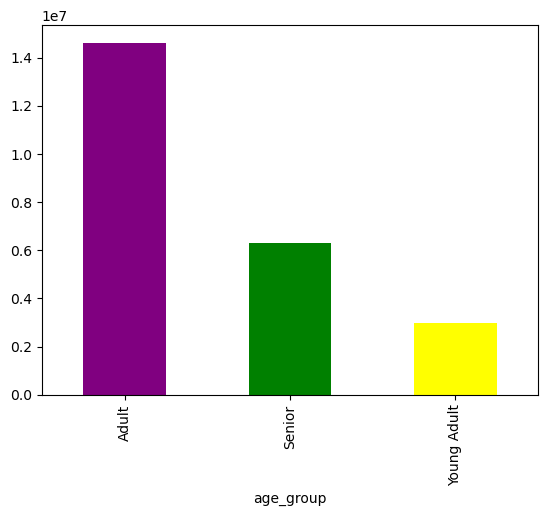

In [25]:
# Age profile visualization

bar=df['age_group'].value_counts().plot.bar(color = ['purple', 'green', 'yellow'])

In [26]:
# Export Bar Chart

bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_agegroup.png'))

Income Profile

In [27]:
#Create inceome profiling variable

df.loc[df['income']<40000, 'income_group']='low income'
df.loc[(df['income']>=40000)&(df['income']<150000), 'income_group']='middle income'
df.loc[df['income']>150000, 'income_group']='high income'

In [28]:
# Checking new variable

df['income_group'].value_counts()

income_group
middle income    19630755
high income       2997772
low income        1288977
Name: count, dtype: int64

In [29]:
# Aggregate for income group order frequency

df.groupby('income_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                       mean  min   max
income_group                                          
high income                       10.148905  0.0  30.0
low income                        11.253650  0.0  30.0
middle income                     10.365319  0.0  30.0

In [30]:
# Aggregate for income group expenditure

df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
high income    31.379488  1.0  99999.0
low income      6.495466  1.0     25.0
middle income   9.136493  1.0  99999.0

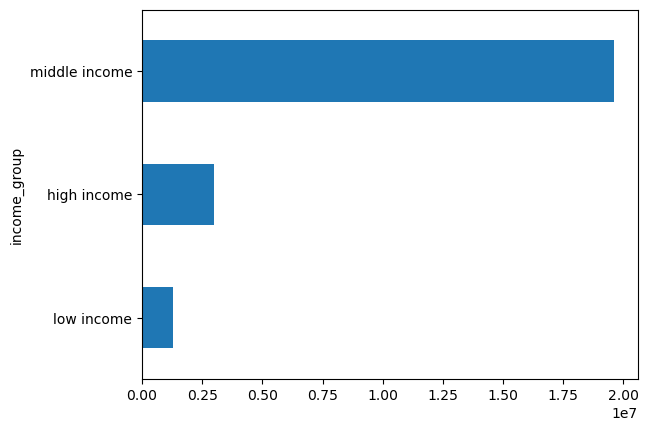

In [33]:
#Income profile visualization

bar2=df['income_group'].value_counts().sort_values().plot.barh()

In [34]:
# Export Bar Chart

bar2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_incomegroup.png'))

In [35]:
# Creating dependent group profiling variable
df.loc[df['Number_of_dependents']>0, 'dependent_group']='has dependents' 
df.loc[df['Number_of_dependents']==0, 'dependent_group']='no dependents'

In [36]:
# Checking new variable

df['dependent_group'].value_counts()

dependent_group
has dependents    17962123
no dependents      5956072
Name: count, dtype: int64

In [37]:
# Aggregate for dependent group order frequency

df.groupby('dependent_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                         mean  min   max
dependent_group                                         
has dependents                      10.391150  0.0  30.0
no dependents                       10.370538  0.0  30.0

In [38]:
# Aggregate for dependent group expenditure

df.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_group                         
has dependents   11.715137  1.0  99999.0
no dependents    11.983352  1.0  99999.0

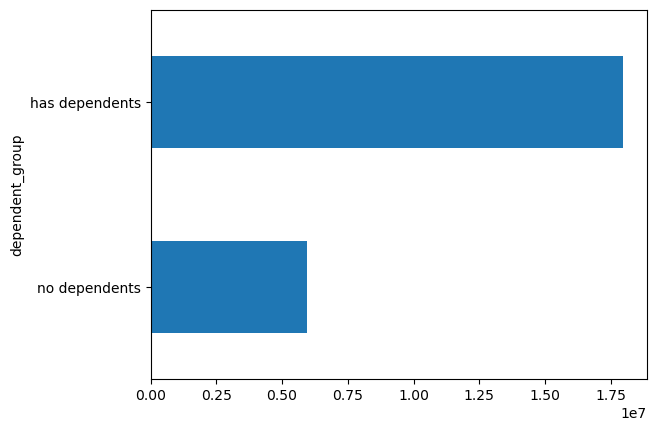

In [39]:
# Number of dependent group profile visualization

bar10 = df['dependent_group'].value_counts().sort_values().plot.barh()

In [40]:
# Export Bar Chart

bar10.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_dependentgroup.png'))

Department ID profile

In [41]:
#Importing departments dataframe

df_dept=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [42]:
#Checking Dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
#Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [44]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [45]:
#Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict


{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [46]:
# Connect department names to department_id in dataframe

df['department'] = df['department_id'].map(data_dict)

In [47]:
#Checking dataframe
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,Number_of_dependents,Marital_Status,income,region,activity,age_group,income_group,dependent_group,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2/17/2019,3,married,40423,South,high,Adult,middle income,has dependents,household


Department - Baby Profile

In [48]:
# Creating baby department profiling variable

df['baby_status'] = [1 if x == 'babies' else 0 for x in df['department']]
df['baby_status'] = df.groupby(['user_id'])['baby_status'].transform(np.max)

C:\Users\msyeu\AppData\Local\Temp\ipykernel_15052\2511058100.py:4: FutureWarning: The provided callable <function max at 0x000001DEEF5544A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['baby_status'] = df.groupby(['user_id'])['baby_status'].transform(np.max)


In [49]:
#Checking new variable

df['baby_status'].value_counts(dropna=False)

baby_status
0    16560485
1     7357710
Name: count, dtype: int64

In [50]:
# Aggregate for baby status bracket order frequency

df.groupby('baby_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
baby_status                                         
0                               11.228756  0.0  30.0
1                                8.489210  0.0  30.0

In [51]:
# Aggregate for baby status bracket expenditure

df.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.330869  1.0  99999.0
1            10.546388  1.0  99999.0

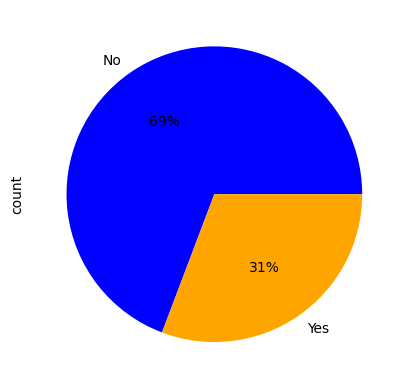

In [52]:
# Baby Status Visualization

pie = df['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

In [53]:
#Export pie chart

pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_babystatus.png'))

Department - Alcohol Profile

In [54]:
#Creating alcohol profiling variable
df['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df['department']]
df['alcohol_status'] = df.groupby(['user_id'])['alcohol_status'].transform(np.max)

C:\Users\msyeu\AppData\Local\Temp\ipykernel_15052\3553741728.py:3: FutureWarning: The provided callable <function max at 0x000001DEEF5544A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['alcohol_status'] = df.groupby(['user_id'])['alcohol_status'].transform(np.max)


In [55]:
#Checking new variable

df['alcohol_status'].value_counts(dropna=False)

alcohol_status
0    22163510
1     1754685
Name: count, dtype: int64

In [56]:
# Aggregate for alcohol_status bracket order frequency

df.groupby('alcohol_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
alcohol_status                                         
0                                  10.413858  0.0  30.0
1                                  10.034357  0.0  30.0

In [57]:
# Aggregate for alcohol_status bracket expenditure

df.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               10.863053  1.0  99999.0
1               23.388274  1.0  99999.0

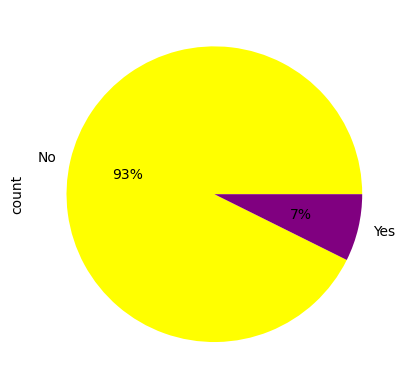

In [58]:
# Alcohol_status visualization

pie2 = df['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','purple'])

In [59]:
#Export alcohol_status pie chart

pie2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_alcoholstatus.png'))

Department - Pet Profile

In [60]:
#Creating pet profiling variable: 
#bought pet supplies(1) 
#didn't buy pet supplies (0)

df['pet_status'] = [1 if x == 'pets' else 0 for x in df['department']]
df['pet_status']=df.groupby(['user_id'])['pet_status'].transform(np.max)

C:\Users\msyeu\AppData\Local\Temp\ipykernel_15052\1820921294.py:6: FutureWarning: The provided callable <function max at 0x000001DEEF5544A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['pet_status']=df.groupby(['user_id'])['pet_status'].transform(np.max)


In [61]:
# Checking new variable

df['pet_status'].value_counts(dropna=False)

pet_status
0    21283463
1     2634732
Name: count, dtype: int64

In [62]:
#Aggregating for pet_status bracket order frequency
df.groupby('pet_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                    mean  min   max
pet_status                                         
0                               10.51382  0.0  30.0
1                                9.35362  0.0  30.0

In [63]:
#Aggregating for pet_status bracket expenditure
df.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.439422  1.0  99999.0
1           14.548696  1.0  99999.0

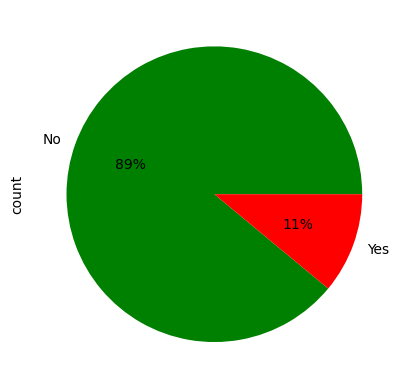

In [64]:
# Pet_status Visualization

pie3 = df['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

In [65]:
#Export Pet_status Pie Chart

pie3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_petstatus_png'))

# Step 8-9. Compare your customer profiles with regions and departments. Product Suitable charts to illustrate your reports and export them in your project folder. 

In [66]:
# Creating crosstab for region and age group

age_region = pd.crosstab(df['region'], df['age_group'], dropna = False)

In [67]:
# Checking crosstab

age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,3471393,1469164,681135
Northeast,2553393,1133878,528130
South,4853737,2107581,1009531
West,3748142,1612968,749143


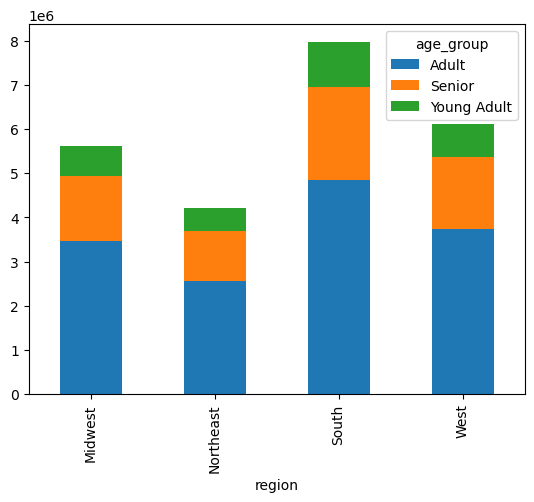

In [68]:
# Age_region Bar Chart
bar3 = age_region.plot(kind='bar', stacked =True)

In [69]:
bar3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_age_region.png'))

In [70]:
# Creating crosstab for region and income

region_income = pd.crosstab(df['region'], df['income_group'], dropna = False)

In [71]:
# Checking crosstab

region_income

income_group,high income,low income,middle income,NaN
region,,,,
Midwest,707429,298767,4614962,534
Northeast,518608,222533,3474260,0
South,995992,440062,6534638,157
West,775743,327615,5006895,0


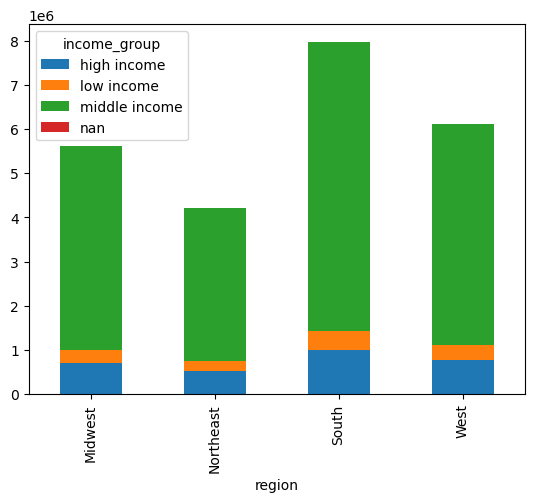

In [72]:
# Region_income bar chart

bar4 = region_income.plot(kind='bar', stacked =True)

In [75]:
bar4.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_income.png'))

In [76]:
# Creating crosstab for region and department

region_dep = pd.crosstab(df['department'], df['region'], dropna = False)

In [77]:
# Checking Crosstab

region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,25850,20462,37250,29055
babies,74052,55226,105575,78697
bakery,202883,154020,287188,222023
beverages,462554,355312,663684,500359
breakfast,121056,91134,171750,133602
bulk,6107,4236,8473,6887
canned goods,186810,138401,263043,201837
dairy eggs,934473,701474,1326258,1018397
deli,182248,138242,257893,198558


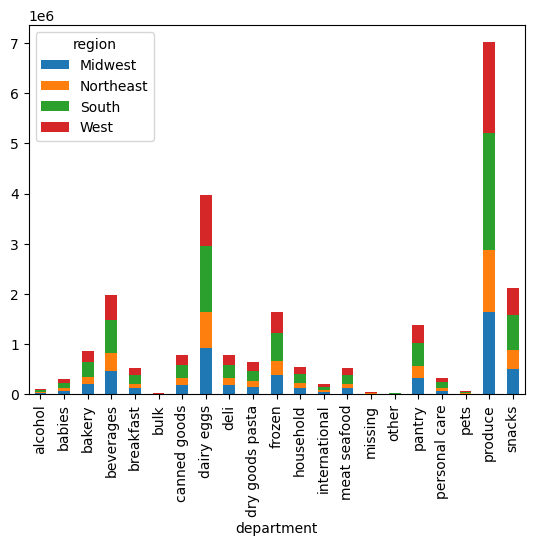

In [78]:
# Region_department Bar Chart

bar5 = region_dep.plot(kind='bar', stacked =True)

In [79]:
#Exporting bar chart

bar5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_department.png'))

In [80]:
# Creating crosstab for region and price range

region_pricerange = pd.crosstab(df['region'], df['price_range_loc'], dropna = False)

In [81]:
# Checking crosstab

region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,72376,1754507,3794809
Northeast,53930,1322003,2839468
South,103192,2486670,5380987
West,78608,1911969,4119676


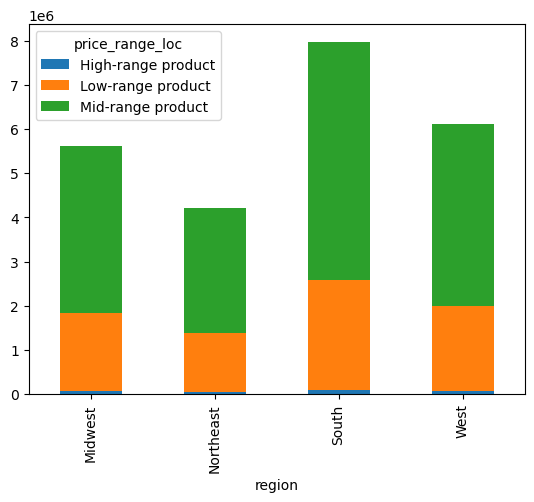

In [82]:
# Region_pricerange Bar Chart

bar6 = region_pricerange.plot(kind='bar', stacked =True)

In [83]:
#Exporting bar chart
bar6.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_region_pricerange.png'))

In [84]:
# Creating crosstab for income and frequency

income_freq = pd.crosstab(df['income_group'], df['order_frequency_flag'], dropna = False)

In [85]:
# Checking crosstab

income_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high income,2030250,310692,656830
low income,793564,181238,314175
middle income,13088608,2177532,4364615
NaN,534,0,157


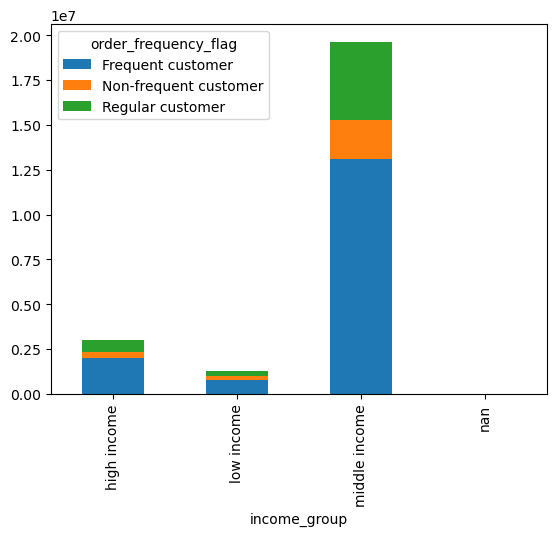

In [86]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

In [87]:
bar7.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_income_frequency.png'))

In [88]:
# Creating crosstab for age and frequency

age_freq = pd.crosstab(df['age_group'], df['order_frequency_flag'], dropna = False)

In [89]:
# Checking crosstab

age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,9712005,1646876,3267784
Senior,4226698,694225,1402668
Young Adult,1974253,328361,665325


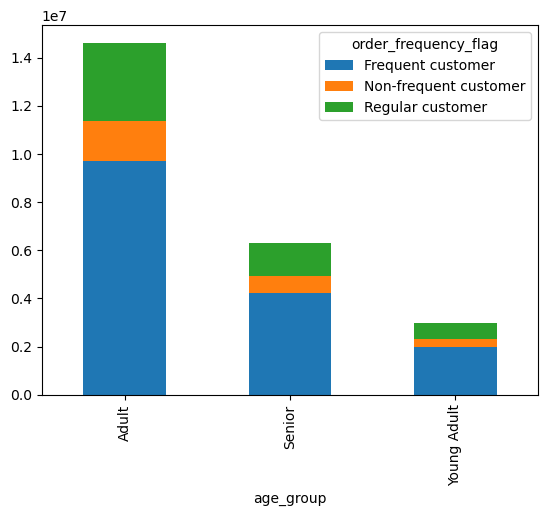

In [90]:
# Region Price Range Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

In [91]:
# Exporting bar chart

bar8.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_age_freq.png'))

In [94]:
# Creating crosstab for marital status and frequency

marital_freq = pd.crosstab(df['Marital_Status'], df['order_frequency_flag'], dropna = False)

In [95]:
# Checking crosstab

marital_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Marital_Status,,,
divorced/widowed,1366637,221197,457595
living with parents and siblings,765880,126601,239620
married,11202789,1887990,3739243
single,2577650,433674,899319


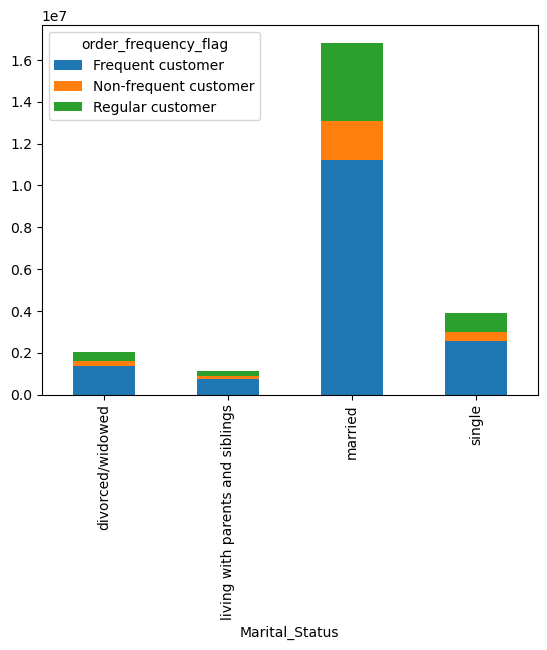

In [96]:
#Marital_freq Bar Chart

bar9 = marital_freq.plot(kind='bar', stacked =True)

In [97]:
# Exporting bar chart

bar9.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_marital_freq.png'))

In [98]:
# export dataframe 

df.to_pickle(os.path.join(path, 'Data','Prepared Data', 'insta_final.pkl')) 

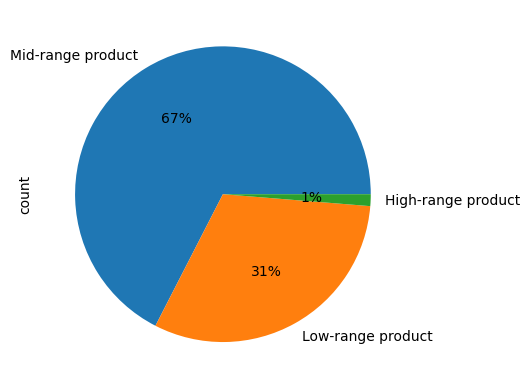

In [99]:
pie = df['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

In [100]:
# Exporting pie chart

pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pie_price_range_loc.png'))

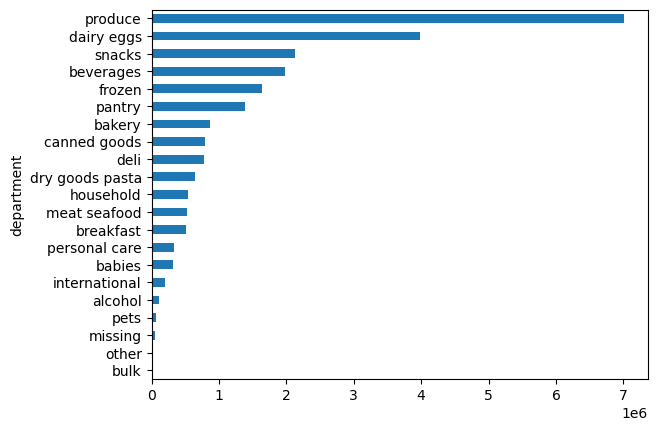

In [101]:
Bar =df.department.value_counts().sort_values().plot(kind = 'barh')

In [102]:
# Exporting bar chart

Bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Bar_department.png'))

In [103]:
dep_freq = pd.crosstab(df['department'], df['order_frequency_flag'], dropna = False)

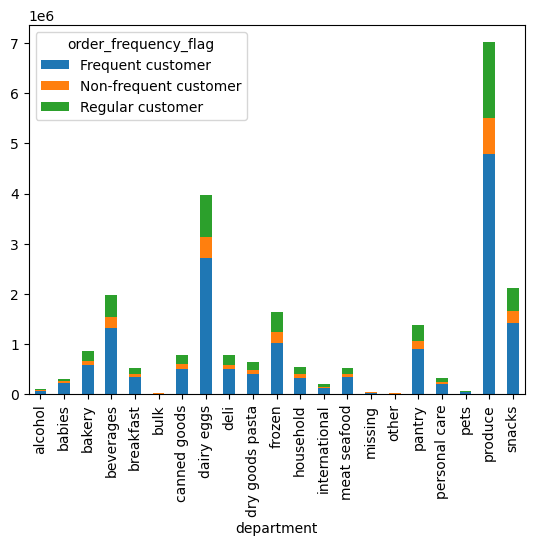

In [104]:
bar = dep_freq.plot(kind='bar', stacked =True)

In [105]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_frequency.png'))